Part 1

DON'T RUN THIS CODE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns



In [14]:
#Load the Excel files
files = 'output.xlsx'
data = pd.ExcelFile(files)

# Load the sheets
df_results = pd.read_excel(data, 'results')
df = pd.read_excel(data, 'q_react_length', header=None)
df.dropna(axis=1, how="all", inplace=True)
df_results.head
df.head()

,0,1,3,4,6,7,9,10,12,13,...,75,76,78,79,81,82,84,85,87,88
0,time[minutes],queue_preparation_length scenario 0,time[minutes],queue_preparation_length scenario 1,time[minutes],queue_preparation_length scenario 2,time[minutes],queue_preparation_length scenario 3,time[minutes],queue_preparation_length scenario 4,...,time[minutes],queue_preparation_length scenario 25,time[minutes],queue_preparation_length scenario 26,time[minutes],queue_preparation_length scenario 27,time[minutes],queue_preparation_length scenario 28,time[minutes],queue_preparation_length scenario 29
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,2,0,2,0,2,0,2,0,2,0,...,2,0,2,0,2,0,2,0,2,0
4,3,0,3,0,3,0,3,0,3,0,...,3,0,3,0,3,0,3,0,3,0


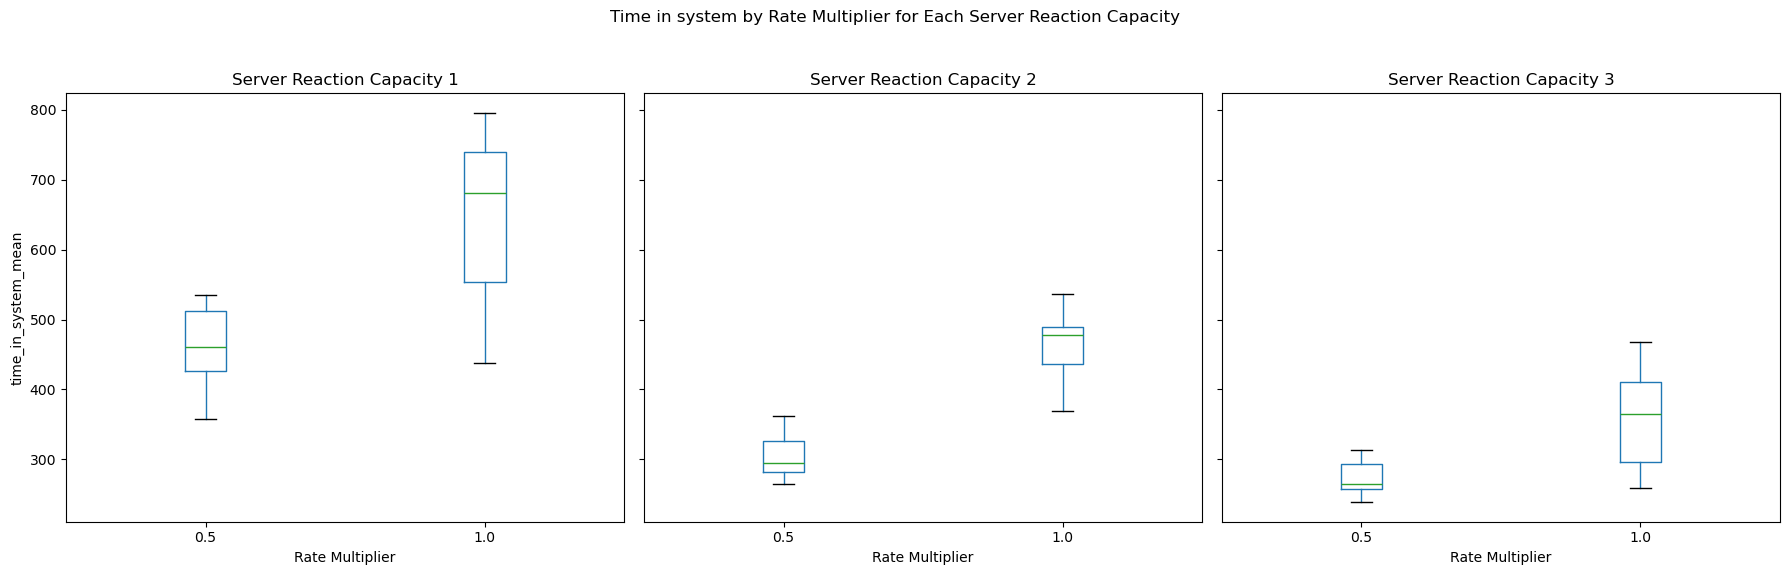

In [3]:

# Creating the subplots for each server_reaction_capacity
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plotting boxplots for each server_reaction_capacity group
for idx, capacity in enumerate(df_results['server_reaction_capacity'].unique()):
    # Filter data for the current capacity
    df_capacity = df_results[df_results['server_reaction_capacity'] == capacity]
    
    # Creating boxplot for the current capacity group
    df_capacity.boxplot(column='time_in_system_mean', by='rate_multiplier', ax=axs[idx], grid=False)
    
    # Customizing each subplot
    axs[idx].set_title(f'Server Reaction Capacity {capacity}')
    axs[idx].set_xlabel('Rate Multiplier')
    axs[idx].set_ylabel('time_in_system_mean' if idx == 0 else "")

# Overall title for the figure
plt.suptitle('Time in system by Rate Multiplier for Each Server Reaction Capacity')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit titles
plt.show()

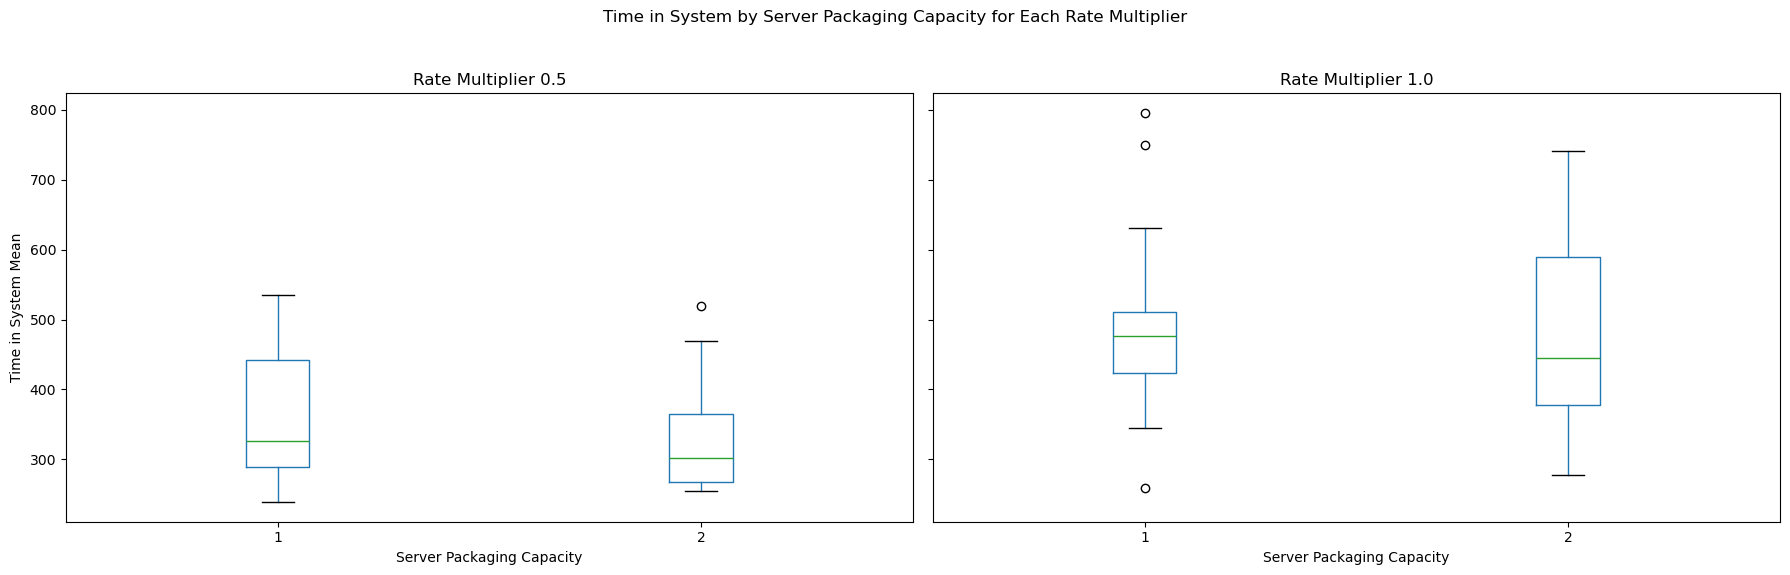

In [4]:
import matplotlib.pyplot as plt

# Erstelle Subplots für jede Rate
unique_ratios = df_results['rate_multiplier'].unique()
fig, axs = plt.subplots(1, len(unique_ratios), figsize=(18, 6), sharey=True)

# Erstelle Boxplots für jede Rate, aufgeteilt nach server_packaging_capacity
for idx, ratio in enumerate(unique_ratios):
    # Daten für die aktuelle Rate filtern
    df_ratio = df_results[df_results['rate_multiplier'] == ratio]
    
    # Boxplot für server_packaging_capacity (1 und 2) innerhalb der aktuellen Rate
    df_ratio.boxplot(column='time_in_system_mean', by='server_packaging_capacity', ax=axs[idx], grid=False)
    
    # Anpassen des Plots
    axs[idx].set_title(f'Rate Multiplier {ratio}')
    axs[idx].set_xlabel('Server Packaging Capacity')
    axs[idx].set_ylabel('Time in System Mean' if idx == 0 else "")

# Gesamttitel für die Figur
plt.suptitle('Time in System by Server Packaging Capacity for Each Rate Multiplier')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Layout anpassen, um Titel anzupassen
plt.show()


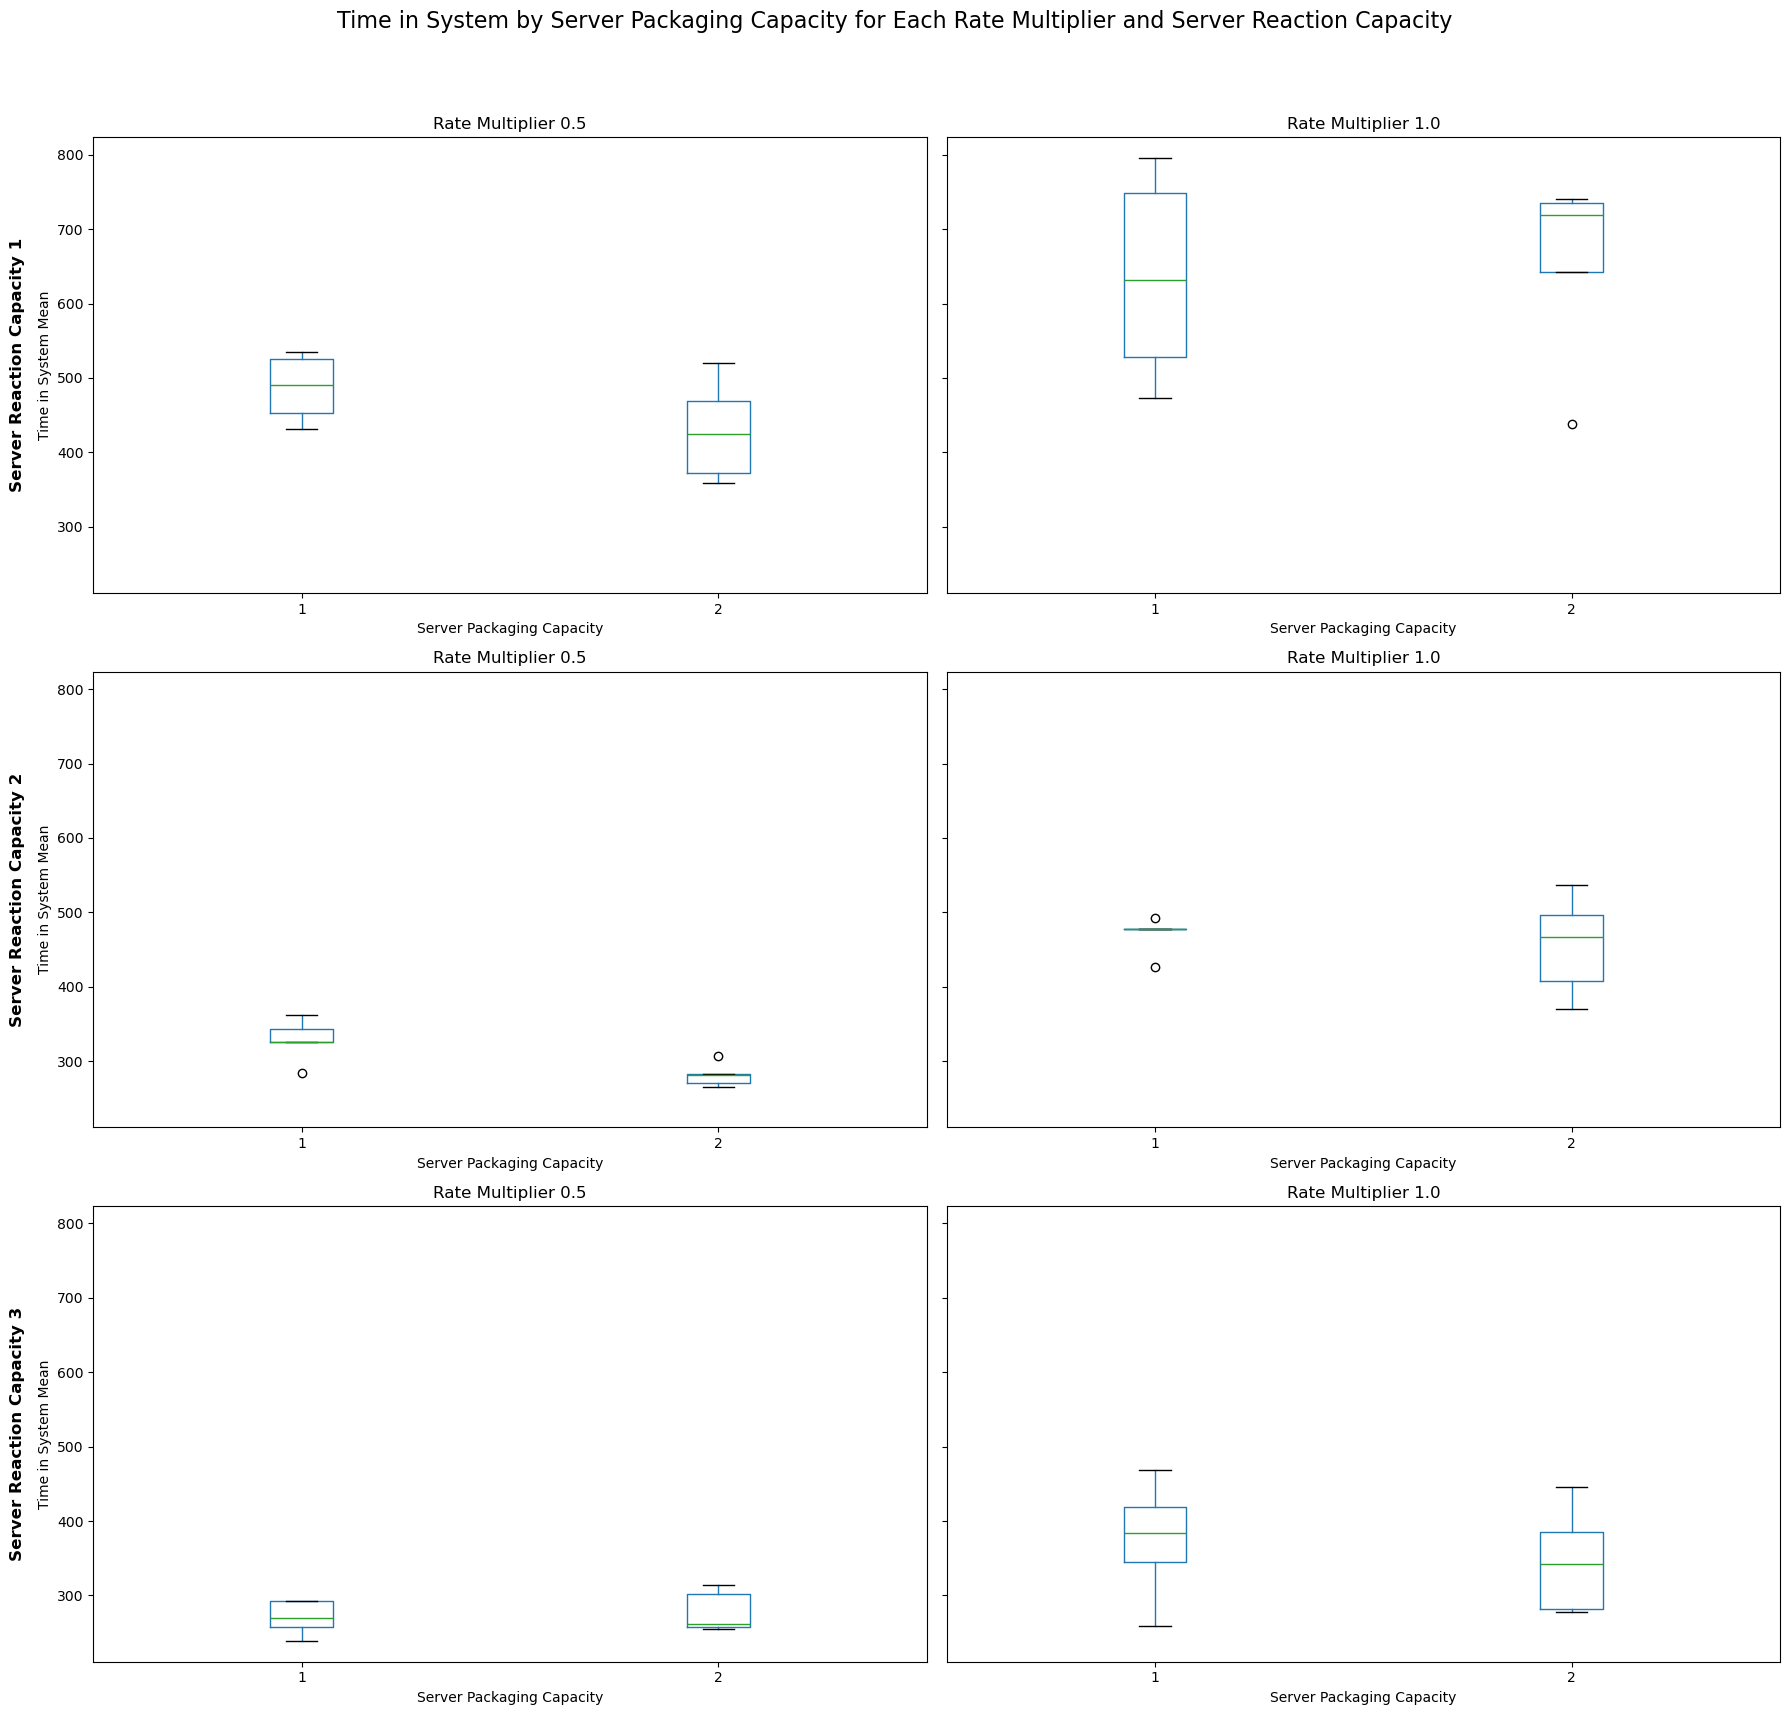

In [5]:
import matplotlib.pyplot as plt

# Einzigartige Werte für `server_reaction_capacity` und `rate_multiplier` abrufen
unique_capacities = df_results['server_reaction_capacity'].unique()
unique_ratios = df_results['rate_multiplier'].unique()

# Erstelle Subplots für jede `server_reaction_capacity`
fig, axs = plt.subplots(len(unique_capacities), len(unique_ratios), figsize=(18, 18), sharey=True)

for row_idx, capacity in enumerate(unique_capacities):
    # Daten für die aktuelle `server_reaction_capacity` filtern
    df_capacity = df_results[df_results['server_reaction_capacity'] == capacity]
    
    for col_idx, ratio in enumerate(unique_ratios):
        # Daten für die aktuelle `rate_multiplier` innerhalb der `server_reaction_capacity` filtern
        df_ratio = df_capacity[df_capacity['rate_multiplier'] == ratio]
        
        # Erstelle einen Boxplot für `server_packaging_capacity` innerhalb der aktuellen Kombination
        df_ratio.boxplot(column='time_in_system_mean', by='server_packaging_capacity', ax=axs[row_idx, col_idx], grid=False)
        
        # Anpassen der Achsentitel
        axs[row_idx, col_idx].set_title(f'Rate Multiplier {ratio}')
        axs[row_idx, col_idx].set_xlabel('Server Packaging Capacity')
        axs[row_idx, col_idx].set_ylabel('Time in System Mean' if col_idx == 0 else "")
    
    # Gesamttitel für jede Reihe (server_reaction_capacity)
    axs[row_idx, 0].annotate(f'Server Reaction Capacity {capacity}', xy=(0, 0.5), xytext=(-axs[row_idx, 0].yaxis.labelpad - 5, 0),
                             xycoords=axs[row_idx, 0].yaxis.label, textcoords='offset points',
                             ha='right', va='center', fontsize=12, fontweight='bold', rotation=90)

# Gesamttitel für die Figur
plt.suptitle('Time in System by Server Packaging Capacity for Each Rate Multiplier and Server Reaction Capacity', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Layout anpassen, um Titel anzupassen
plt.show()


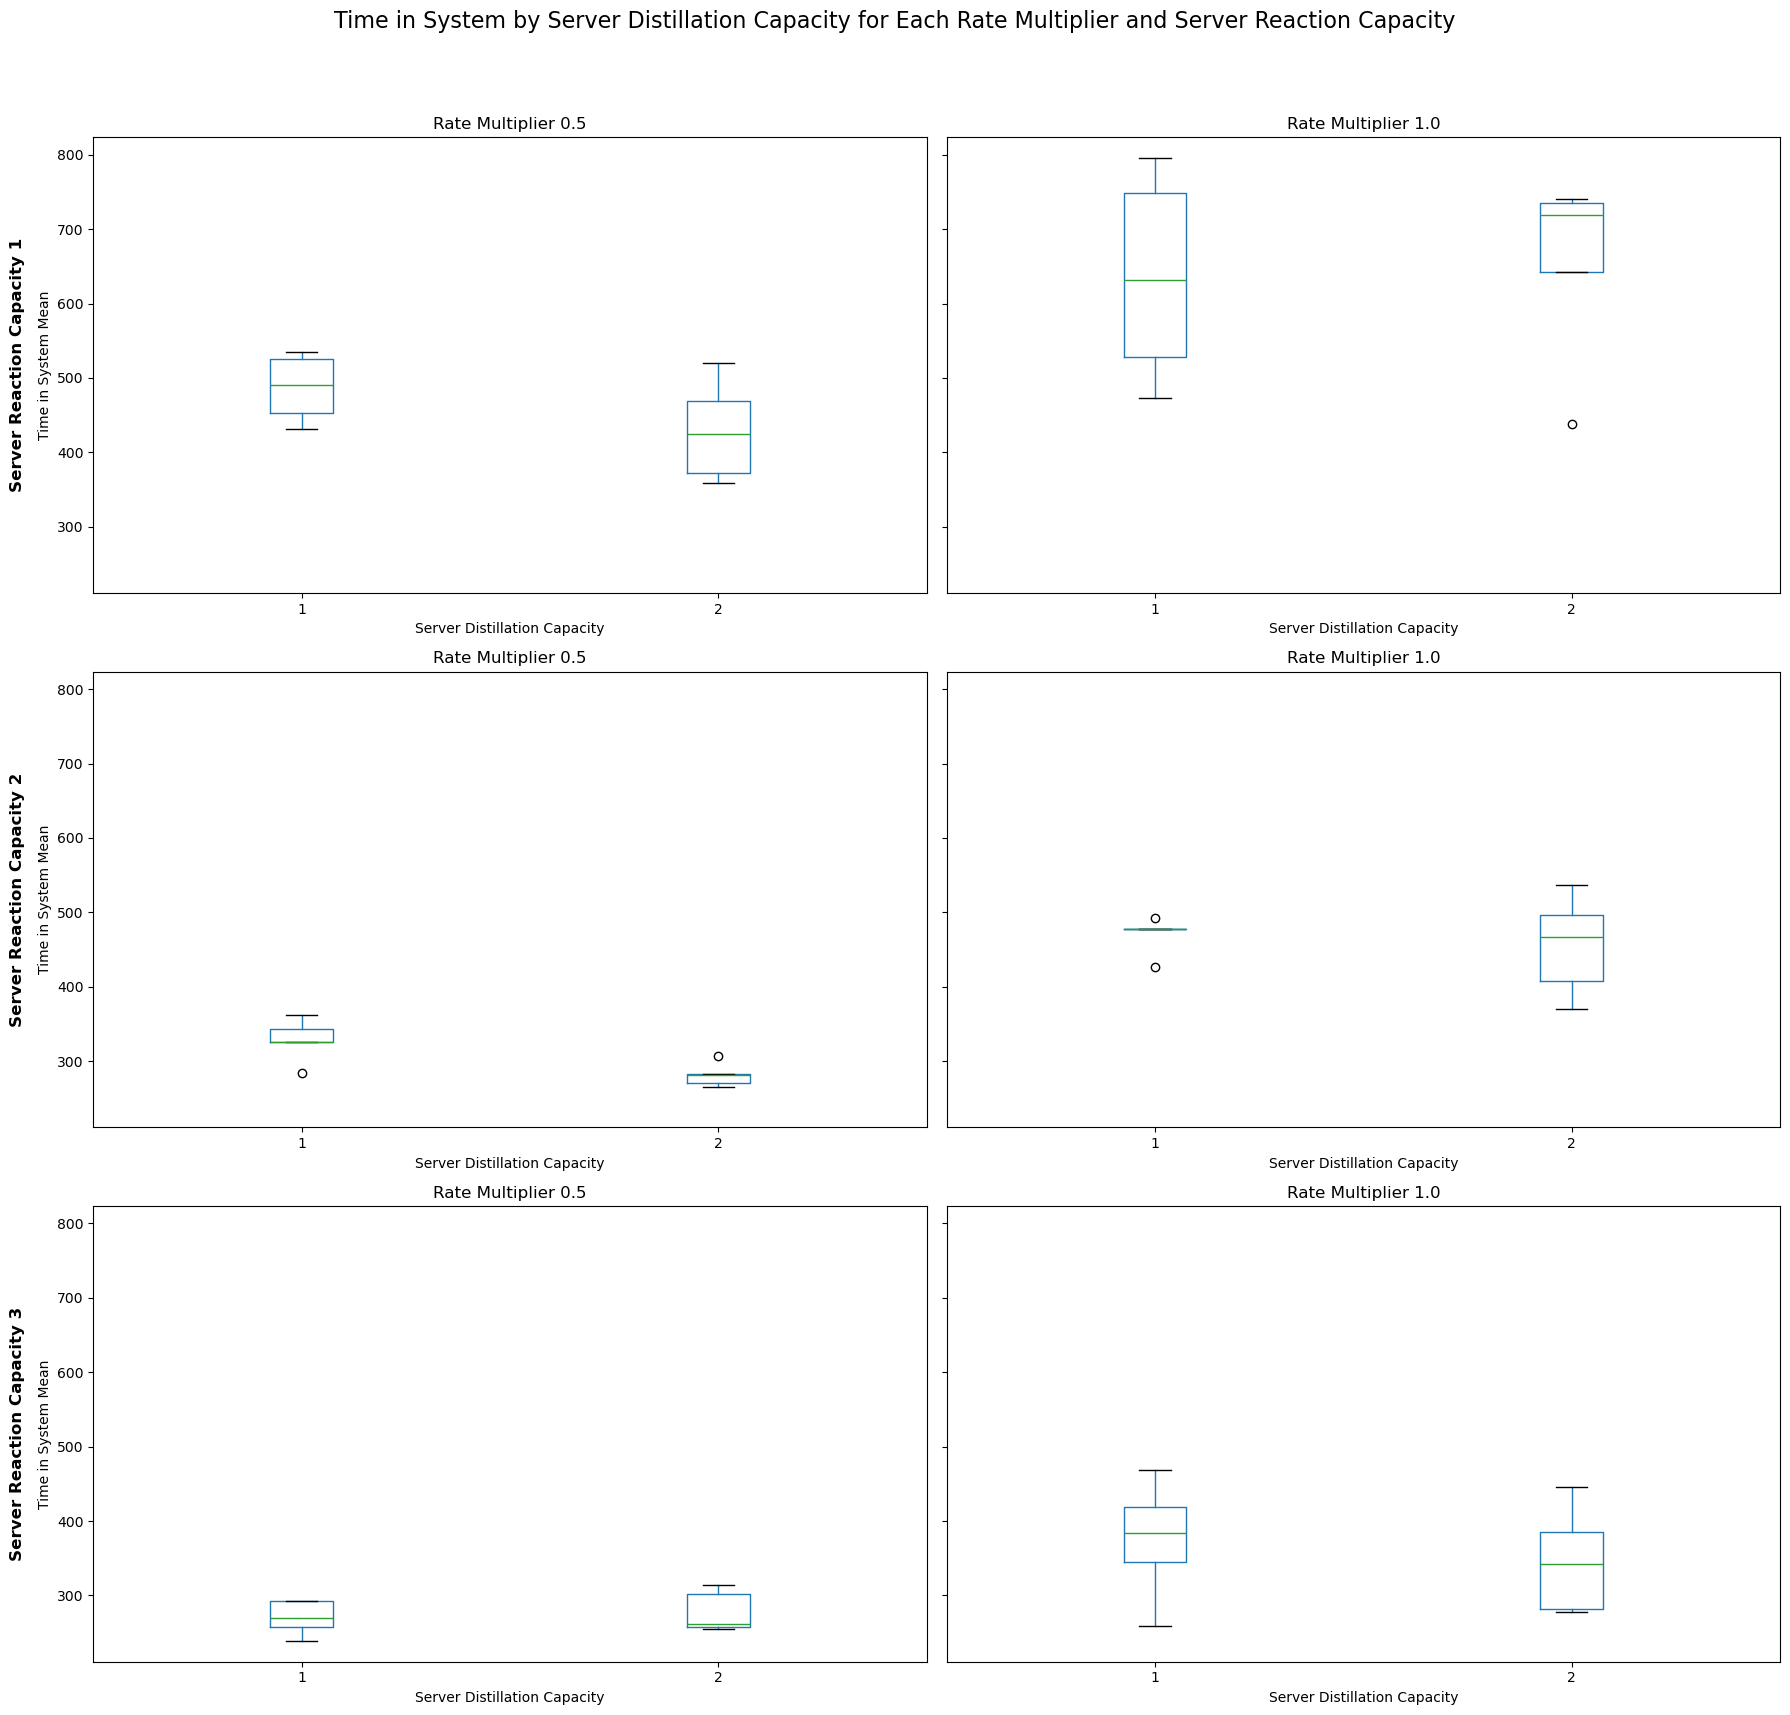

In [6]:
import matplotlib.pyplot as plt

# Einzigartige Werte für `server_reaction_capacity` und `rate_multiplier` abrufen
unique_capacities = df_results['server_reaction_capacity'].unique()
unique_ratios = df_results['rate_multiplier'].unique()

# Erstelle Subplots für jede `server_reaction_capacity`
fig, axs = plt.subplots(len(unique_capacities), len(unique_ratios), figsize=(18, 18), sharey=True)

for row_idx, capacity in enumerate(unique_capacities):
    # Daten für die aktuelle `server_reaction_capacity` filtern
    df_capacity = df_results[df_results['server_reaction_capacity'] == capacity]
    
    for col_idx, ratio in enumerate(unique_ratios):
        # Daten für die aktuelle `rate_multiplier` innerhalb der `server_reaction_capacity` filtern
        df_ratio = df_capacity[df_capacity['rate_multiplier'] == ratio]
        
        # Erstelle einen Boxplot für `server_distillation_capacity` innerhalb der aktuellen Kombination
        df_ratio.boxplot(column='time_in_system_mean', by='server_distillation_capacity', ax=axs[row_idx, col_idx], grid=False)
        
        # Anpassen der Achsentitel
        axs[row_idx, col_idx].set_title(f'Rate Multiplier {ratio}')
        axs[row_idx, col_idx].set_xlabel('Server Distillation Capacity')
        axs[row_idx, col_idx].set_ylabel('Time in System Mean' if col_idx == 0 else "")
    
    # Gesamttitel für jede Reihe (server_reaction_capacity)
    axs[row_idx, 0].annotate(f'Server Reaction Capacity {capacity}', xy=(0, 0.5), xytext=(-axs[row_idx, 0].yaxis.labelpad - 5, 0),
                             xycoords=axs[row_idx, 0].yaxis.label, textcoords='offset points',
                             ha='right', va='center', fontsize=12, fontweight='bold', rotation=90)

# Gesamttitel für die Figur
plt.suptitle('Time in System by Server Distillation Capacity for Each Rate Multiplier and Server Reaction Capacity', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Layout anpassen, um Titel anzupassen
plt.show()

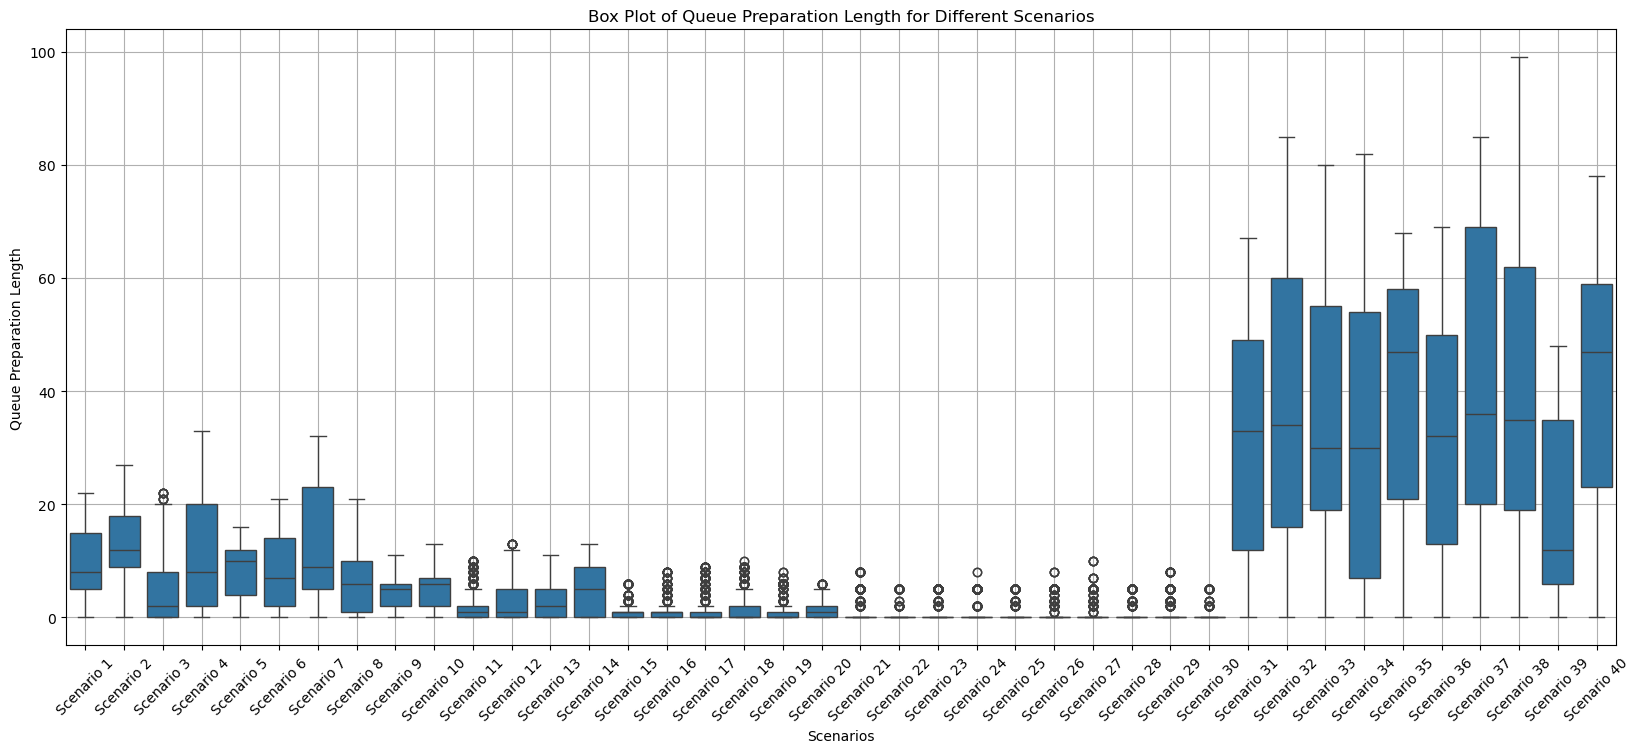

In [7]:

# Initialize an empty DataFrame for reshaping

queue_data = pd.DataFrame()




# Loop through the DataFrame to extract queue lengths and scenario numbers

for i in range(0, len(df.columns), 3):  # Step by 3 to skip empty columns

    if i + 1 < len(df.columns):  # Check if the queue length column exists

        scenario_num = i // 3  # Determine the scenario based on the current index

        # Create a DataFrame for the current scenario's queue lengths

        temp_df = pd.DataFrame({

            'Queue Length': pd.to_numeric(df[i + 1], errors='coerce'),  # Convert to numeric

            'Scenario': f'Scenario {scenario_num + 1}'  # +1 to adjust for 0-indexing

        })

        # Append the temporary DataFrame to the main DataFrame

        queue_data = pd.concat([queue_data, temp_df], ignore_index=True)




# Drop rows with NaN values in the 'Queue Length' column

queue_data.dropna(subset=['Queue Length'], inplace=True)




# Create the box plot

plt.figure(figsize=(20, 8))

sns.boxplot(x='Scenario', y='Queue Length', data=queue_data)

plt.title('Box Plot of Queue Preparation Length for Different Scenarios')

plt.xlabel('Scenarios')

plt.ylabel('Queue Preparation Length')

plt.xticks(rotation=45)

plt.grid()




# Show the plot

plt.show()


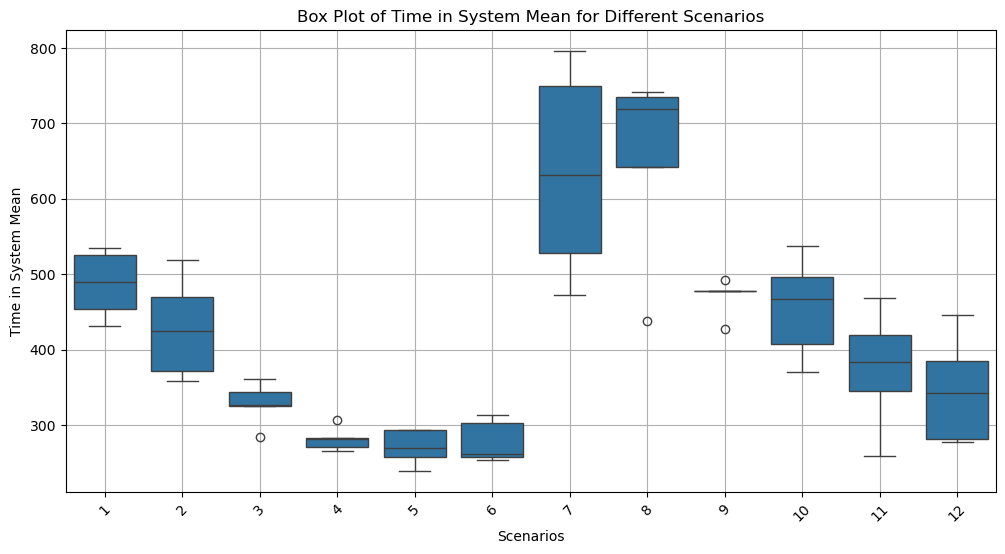

In [8]:
# Create the box plot for time_in_system_mean per Scenario

plt.figure(figsize=(12, 6))




# Use the boxplot function from seaborn

sns.boxplot(x='scenario', y='time_in_system_mean', data=df_results)




# Title and labels

plt.title('Box Plot of Time in System Mean for Different Scenarios')

plt.xlabel('Scenarios')

plt.ylabel('Time in System Mean')

plt.xticks(rotation=45)

plt.grid()




# Show the plot

plt.show()


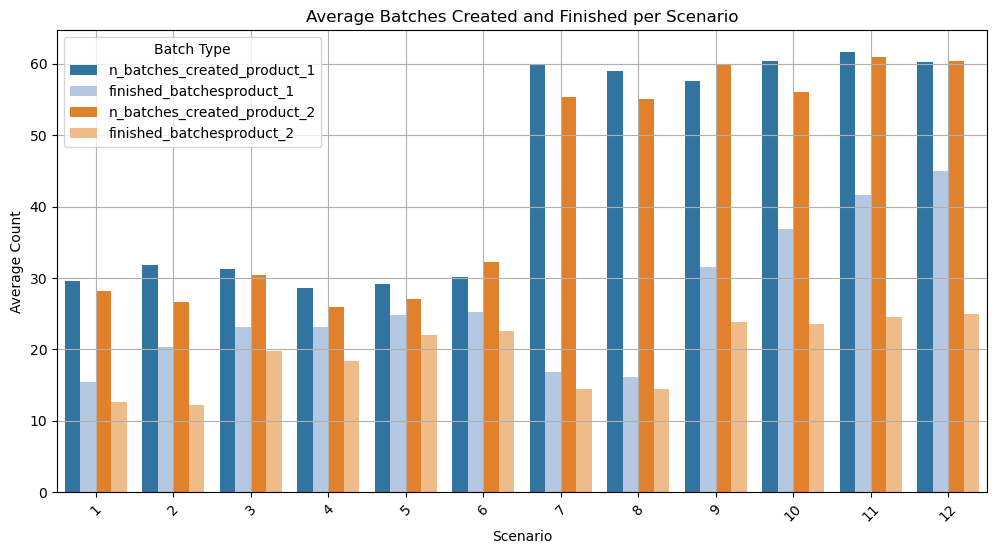

In [12]:
# Step 1: Calculate the Means

mean_batches = df_results.groupby('scenario').agg({

    'n_batches_created_product_1': 'mean',

    'finished_batchesproduct_1': 'mean',

    'n_batches_created_product_2': 'mean',

    'finished_batchesproduct_2': 'mean'

}).reset_index()




# Step 2: Reshape the Data for Plotting

mean_batches_melted = mean_batches.melt(id_vars='scenario', 

                                          value_vars=['n_batches_created_product_1', 'finished_batchesproduct_1',
 

                                                      'n_batches_created_product_2', 'finished_batchesproduct_2'],

                                          var_name='Batch Type', 

                                          value_name='Count')




# Step 3: Create the Bar Chart with Custom Colors

plt.figure(figsize=(12, 6))




# Define a custom color palette

palette = {

    'n_batches_created_product_1': '#1f77b4',  # Blue for created Product 1

    'finished_batchesproduct_1': '#aec7e8',     # Light blue for finished Product 1

    'n_batches_created_product_2': '#ff7f0e',   # Orange for created Product 2

    'finished_batchesproduct_2': '#ffbb78'       # Light orange for finished Product 2

}




# Create the bar plot

sns.barplot(data=mean_batches_melted, x='scenario', y='Count', hue='Batch Type', palette=palette)




# Title and labels

plt.title('Average Batches Created and Finished per Scenario')

plt.xlabel('Scenario')

plt.ylabel('Average Count')

plt.xticks(rotation=45)

plt.legend(title='Batch Type')

plt.grid()


In [11]:
# Create a new DataFrame for the stacked area plot

# Initialize an empty DataFrame to hold waiting batches for each scenario

waiting_batches = pd.DataFrame()




# Assuming the time is in the first column and scenarios are structured as described

for scenario in range(12):  # For 12 scenarios

    # Extract the waiting batches for each scenario

    batches_column = f'queue_preparation_length scenario {scenario * 5}'

    waiting_batches[scenario] = df[batches_column]  # Adjust if column names differ




# Convert time to hours if the first column contains time in minutes

time_hours = df.iloc[:, 0] / 60  # Convert time from minutes to hours




# Add time as the first column in waiting_batches

waiting_batches.insert(0, 'Time [h]', time_hours)




# Step 3: Create the Stacked Area Plot

plt.figure(figsize=(12, 6))

plt.stackplot(waiting_batches['Time [h]'], waiting_batches.iloc[:, 1:].T, labels=[f'Scenario {i+1}' for i in range(12)])

plt.title('Stacked Area Plot of Batches Waiting Over Time for All Scenarios')

plt.xlabel('Time [h]')

plt.xlim(0, 24)

plt.ylabel('Number of Batches Waiting')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.grid()

plt.tight_layout()




# Show the plot

plt.show()


KeyError: 'queue_preparation_length scenario 0'

Part II
